In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [5]:
dataframe = pd.read_csv("Zomato data .csv")

In [6]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [55]:
# Convert data type of "rate" column to float and remove denominator
def convt(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

dataframe['rate']=dataframe['rate'].apply(convt)
print(dataframe.head())
    

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [9]:
#check for null values
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [10]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Number of Orders by Restaurant Type')

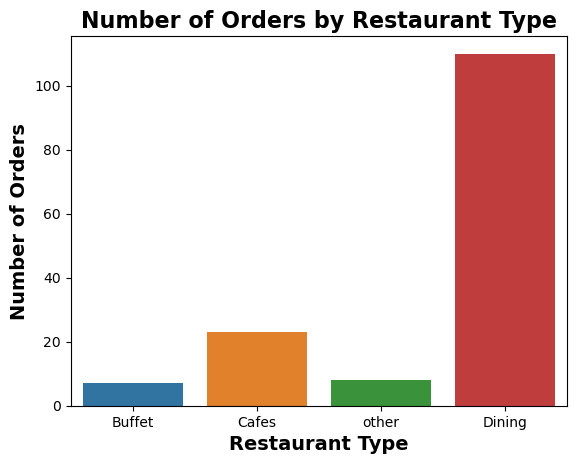

In [12]:
# finding the max. resturant type
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Restaurant Type", fontsize=14, fontweight='bold')
plt.ylabel("Number of Orders", fontsize=14, fontweight='bold')
plt.title("Number of Orders by Restaurant Type", fontsize=16, fontweight='bold')

###  Thus majority of orders come from the Dining Resturants

Text(0, 0.5, 'Votes')

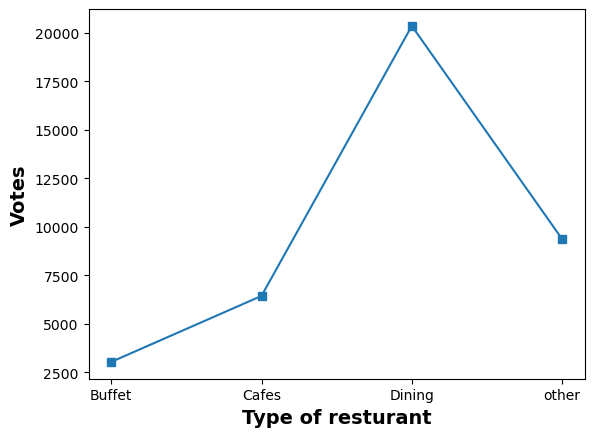

In [23]:
#finding votes for each type of resturant
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result,marker="s")
plt.xlabel("Type of resturant",fontsize=14, fontweight='bold')
plt.ylabel("Votes",fontsize=14, fontweight='bold')

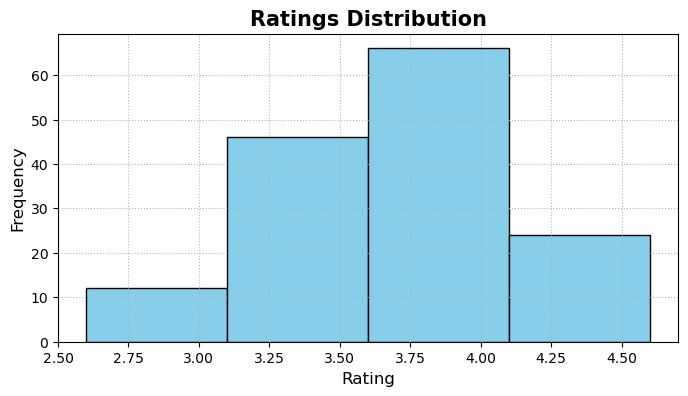

In [34]:
plt.figure(figsize=(8, 4))  
plt.hist(dataframe['rate'], bins=4, color='skyblue', edgecolor='black')  

plt.title("Ratings Distribution", fontsize=15, fontweight='bold')
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# gridlines for better readability
plt.grid(True, linestyle='dotted', alpha=0.9)

plt.show()

## Majority of ratings are between 3.6 and 4.1 

In [35]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


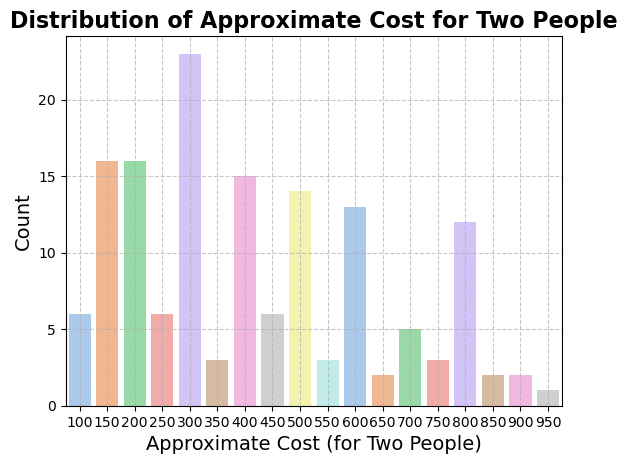

In [43]:
ticket_size=dataframe['approx_cost(for two people)']
sns.countplot(x=ticket_size,palette='pastel')
plt.title("Distribution of Approximate Cost for Two People", fontsize=16, fontweight='bold')
plt.xlabel("Approximate Cost (for Two People)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.grid(True,linestyle="--",alpha=0.7)

## Avg. ticket size for 2 people is 300

Text(0.5, 1.0, 'Distribution of Ratings by Online Mode of Booking')

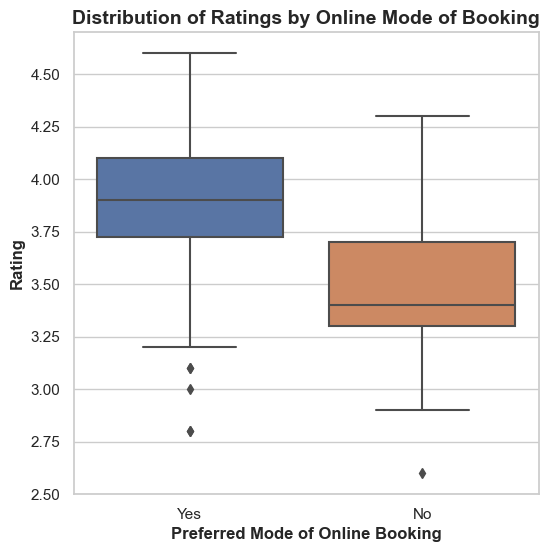

In [52]:
#Preferred mode of booking
plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
ax=sns.boxplot(x='online_order',y='rate',data=dataframe)
ax.set_xlabel('Preferred Mode of Online Booking', fontsize=12, fontweight='bold')
ax.set_ylabel('Rating', fontsize=12, fontweight='bold')
ax.set_title('Distribution of Ratings by Online Mode of Booking', fontsize=14, fontweight='bold')

## Online mode of booking received better ratings

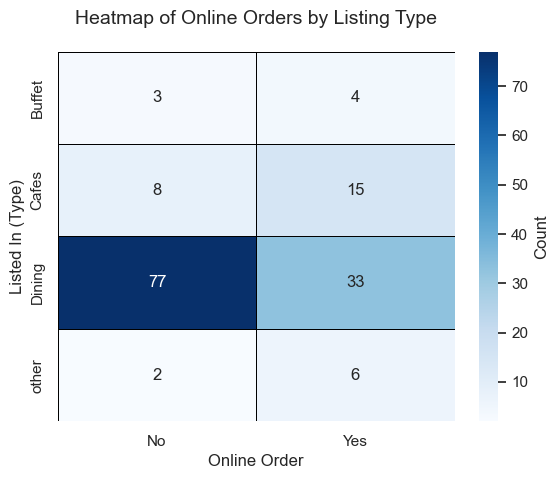

In [62]:
pivot_table=dataframe.pivot_table(index= 'listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="Blues", fmt='d', linewidths=0.5, linecolor='black', cbar_kws={'label': 'Count'})
plt.xlabel("Online Order", fontsize=12)
plt.ylabel("Listed In (Type)", fontsize=12)
plt.title("Heatmap of Online Orders by Listing Type", fontsize=14, pad=20)
plt.show()